# Pre-Proceso (1)


Validación de los datos
* Revisión de valores anómalos
* Revisión de valores faltantes
* Inconsistencias


Inicialización PySpark en colab:


In [1]:
java_v = !java -version 2>&1 | awk -F[\"_] 'NR==1{print $2}'
!java -version

if java_v[0] != "1.8.0":
  !apt-get update
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
  !java -version

import os

if not os.path.exists("spark-2.4.6-bin-hadoop2.7"):
  !wget -q https://www-us.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
  !tar xf spark-2.4.6-bin-hadoop2.7.tgz
  !pip install -q findspark

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import col
sc = spark.sparkContext
from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)

openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Rele

Conectamos Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wF22STN4DbFTJbXwo8BDNRDHWZgURo6M0ZOA3sDVrn-mpITRtJLf3Q
Mounted at /content/drive


# Nueva sección

In [3]:
path='/content/drive/My Drive/MGVD/data'

Lectura del fichero de trabajo

In [4]:
bd = sqlContext.read.format("com.databricks.spark.csv"
).option("header", "true"
).load(path+"/all/*.csv", inferSchema=True 
)

In [5]:
bd.dtypes

[('Issue Type', 'string'),
 ('Issue key', 'string'),
 ('Issue id', 'string'),
 ('Parent id', 'string'),
 ('Summary', 'string'),
 ('Assignee', 'string'),
 ('Reporter', 'string'),
 ('Priority', 'string'),
 ('Status', 'string'),
 ('Resolution', 'string'),
 ('Created', 'string'),
 ('Updated', 'string'),
 ('Due Date', 'string'),
 ('Component/s13', 'string'),
 ('Component/s14', 'string'),
 ('Component/s15', 'string'),
 ('Component/s16', 'string')]

In [7]:
display(bd.limit(50).toPandas())

,Issue Type,Issue key,Issue id,Parent id,Summary,Assignee,Reporter,Priority,Status,Resolution,Created,Updated,Due Date,Component/s13,Component/s14,Component/s15,Component/s16
0,Feature Request,DAVCACHE-19,12323395,None,"""Add support for servlet-mapping other that """"...",mnasato,mnasato,Major,Resolved,Done,12/Mar/06 1:30 PM,12/Mar/06 1:30 PM,None,None,None,None,None
1,Feature Request,DAVCACHE-18,12323195,None,Implement setting of custom properties,mnasato,mnasato,Major,Open,None,05/Mar/06 12:56 PM,05/Mar/06 12:56 PM,None,None,None,None,None
2,Bug,DAVCACHE-17,12323193,None,Invalid XML request must be rejected with 400,mnasato,mnasato,Minor,Resolved,Done,05/Mar/06 12:01 PM,05/Mar/06 12:04 PM,None,None,None,None,None
3,Bug,DAVCACHE-16,12323192,None,COPY must fail if destination parent path does...,mnasato,mnasato,Minor,Resolved,Done,05/Mar/06 11:13 AM,05/Mar/06 11:14 AM,None,None,None,None,None
4,Bug,DAVCACHE-15,12323191,None,MKCOL with unsupported request body must fail,mnasato,mnasato,Minor,Resolved,Done,05/Mar/06 10:48 AM,05/Mar/06 10:50 AM,None,None,None,None,None
5,Bug,DAVCACHE-14,12323190,None,MKCOL must fail if parent path does not exist,mnasato,mnasato,Minor,Resolved,Done,05/Mar/06 10:45 AM,05/Mar/06 10:45 AM,None,None,None,None,None
6,Task,DAVCACHE-13,12323130,None,Run litmus to check WebDAV compliance level,mnasato,mnasato,Major,Resolved,Done,02/Mar/06 5:32 PM,05/Mar/06 12:52 PM,None,None,None,None,None
7,Task,DAVCACHE-12,12322616,None,Investigate how to overflow files to persisten...,mnasato,mnasato,Major,Open,None,18/Feb/06 5:48 AM,28/Mar/06 12:07 PM,None,None,None,None,None
8,Feature Request,DAVCACHE-11,12322615,None,Add a configurable max size limit for files,mnasato,mnasato,Major,Resolved,Done,18/Feb/06 5:45 AM,01/Mar/06 5:18 PM,None,None,None,None,None
9,Bug,DAVCACHE-10,12322559,None,Cannot click on documents in mounted davcache,mnasato,belaban,Major,Resolved,Won't Fix,17/Feb/06 5:14 AM,18/Feb/06 6:00 AM,None,None,None,None,None


In [8]:
bd=bd.select(col('Issue Type').alias('IssueType'), 'Summary', 'Priority')
sqlContext.registerDataFrameAsTable(bd, "bd")

In [49]:
bd.columns
bd.dtypes
bd.count()

1642101

In [10]:
issuesType = sqlContext.sql("select IssueType, count(*) as cantTypes from bd group by IssueType order by cantTypes desc")

In [11]:
issuesType.show()

+------------------+---------+
|         IssueType|cantTypes|
+------------------+---------+
|               Bug|   795932|
|       Improvement|   221087|
|        Suggestion|   128633|
|              Task|   126319|
|          Sub-task|   105188|
|       New Feature|    57732|
|   Feature Request|    47435|
|       Enhancement|    29114|
|             Story|    10751|
|              Test|     9078|
|              Wish|     7411|
| Component Upgrade|     5731|
|              Epic|     4601|
|     Documentation|     3393|
|Dependency upgrade|     2881|
|   Support Request|     2460|
|          Question|     1971|
|           Release|     1202|
|    Technical task|     1094|
|           QE Task|     1080|
+------------------+---------+
only showing top 20 rows



In [12]:
priority = sqlContext.sql("select Priority, count(*) as cantPrior from bd group by Priority order by cantPrior desc").show()

+------------------+---------+
|          Priority|cantPrior|
+------------------+---------+
|             Major|   784720|
|            Closed|   212056|
|             Minor|   180890|
|          Critical|    58842|
|              null|    46847|
|           Blocker|    42011|
|           Trivial|    25888|
|Gathering Interest|    25240|
|               Low|    23038|
|          Resolved|    21697|
|            Normal|    18164|
|             Fixed|    12292|
|              Open|     9990|
|            Medium|     9115|
|  Gathering Impact|     8448|
|                P2|     5986|
|      Needs Triage|     4761|
|         davsclaus|     4674|
|              High|     4264|
|                P3|     3890|
+------------------+---------+
only showing top 20 rows



In [13]:
!pip install wordcloud
!pip install nltk
!pip install spacy

In [14]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

import matplotlib.pyplot as plt
% matplotlib inline

In [15]:
bd.describe(['IssueType']).show()

+-------+--------------------+
|summary|           IssueType|
+-------+--------------------+
|  count|             1642101|
|   mean|                null|
| stddev|                null|
|    min|      const axuti...|
|    max|wsdl2java with Ji...|
+-------+--------------------+



In [16]:
def preprocessIssues(issues, remove_digits=False):
  cleanIssues = []
  for iss in issues:
    text = unicodedata.normalize('NFKD', iss).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    cleanIssues.append(text.lower())
  return cleanIssues

In [17]:
stopWords = ['major', 'adobejira', 'issue']

noEmpty = bd.filter('Summary <> "" ')
display(noEmpty.toPandas())
noEmpty.count()

cleanIssues = preprocessIssues(noEmpty.toPandas().Summary)
text = " ".join(cleanIssues)

,IssueType,Summary,Priority
0,Feature Request,"""Add support for servlet-mapping other that """"...",Major
1,Feature Request,Implement setting of custom properties,Major
2,Bug,Invalid XML request must be rejected with 400,Minor
3,Bug,COPY must fail if destination parent path does...,Minor
4,Bug,MKCOL with unsupported request body must fail,Minor
...,...,...,...
1402597,Suggestion,dlaha,Closed
1402598,Suggestion,hxue,Closed
1402599,Suggestion,hxue,Closed
1402600,Suggestion,njayasankar@atlassian.com,Gathering Interest


In [18]:
def showWordCloud(text, updateStopWords=''):
  stopwords = set(STOPWORDS)
  if (updateStopWords != ''):
    stopwords.update(updateStopWords)
  wordcloud = WordCloud(stopwords=stopwords).generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.figure(figsize=(5,5))
  plt.show()
  return plt

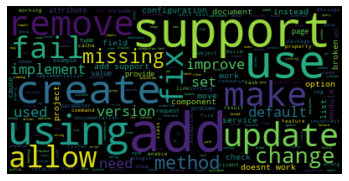

<Figure size 360x360 with 0 Axes>

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [19]:
#General wordcloud
showWordCloud(text, stopWords)

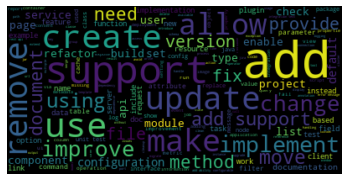

<Figure size 360x360 with 0 Axes>

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [20]:
#NO Bugs
noBug = noEmpty.filter('IssueType <> "Bug"')
noBug.count()
cleanIssues = preprocessIssues(noBug.toPandas().Summary)
text = " ".join(cleanIssues)
showWordCloud(text, stopWords)

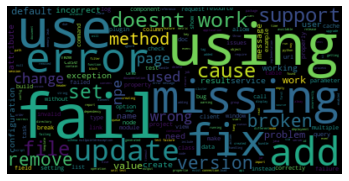

<Figure size 360x360 with 0 Axes>

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [21]:
#Bugs
bugs = noEmpty.filter('IssueType = "Bug"')
bugs.count()
cleanIssues = preprocessIssues(bugs.toPandas().Summary)
text = " ".join(cleanIssues)
showWordCloud(text, stopWords)

In [51]:
likeStory=sqlContext.sql("select IssueType,Summary from bd where IssueType like '%Story%' OR IssueType like '%story%' AND Summary <> '' ")
display(likeStory.toPandas())
likeStory.count()

,IssueType,Summary
0,Story,Make OptaPlanner even more reliable
1,Story,Make OptaPlanner even faster (less slow) and e...
2,Story,Financial optimization
3,Story,Make OptaPlanner even easier to get started wi...
4,Story,Vehicle Routing
...,...,...
10824,Story,Editor should encourage need to configure an i...
10825,Story,Workflow patterns in myExperiment
10826,Story,Support for creating a webservice from a workflow
10827,Story,Annotations (mime-types) contextual view


10829

In [60]:
samplePercent = 0.1
sampleLikeStory = likeStory.sample(True, samplePercent)
display(sampleLikeStory.toPandas())

,IssueType,Summary
0,Story,Drools CS: Existence of elements (QuadStream)
1,Story,Drools CS: BiJoins
2,Story,PillarSwapMove micro benchmark
3,Story,Switching between OSM data in runtime
4,Story,Visualize vehicle routes
...,...,...
1086,Story,Create Java/Scala API example with using Predi...
1087,Story,Create docker image for Java API distribution
1088,Story,"As a user, I would like to have an arg_scope f..."
1089,Story,Run Docker from Taverna


In [45]:
likeAsA=sqlContext.sql("select IssueType,Summary from bd where Summary like '%As a%' OR Summary like '%as a%' AND Summary <> '' ")
display(likeAsA.toPandas())
likeAsA.count()

,IssueType,Summary
0,Bug,we have deployed dashbuilder on Tomcat7 on AWS...
1,Feature Request,Support kubeadmin as a valid CRW user (OS Oaut...
2,QE Task,Create smoke suite as an entry quality gate fo...
3,Task,"""Add ability to launch all tests from the """"de..."
4,Feature Request,Allow the runBrowserSim command to accept a UR...
...,...,...
9992,Improvement,The artifactory.plugin.skip needs to be a JVM ...
9993,Sub-task,"""Create a """"document home"""" asciidoc page to b..."
9994,Enhancement,JBoss-as quickstart team has asked us to remov...
9995,Task,Create an appcelerator based hybrid applicatio...


9997

In [48]:
samplePercent = 0.3
sampleLikeStory = likeAsA.sample(True, samplePercent)
display(sampleLikeStory.toPandas())

,IssueType,Summary
0,Task,Review use of HashMap vs. Map as a type declar...
1,Bug,JndiRepositoryFactory Has a configFile Propert...
2,Bug,[GSS](7.2.z) WFCORE-4768 - WFLYIO001: Worker '...
3,Feature Request,Explorer: As a user I want to be able to creat...
4,Feature Request,Explorer: As a user I want to be able to creat...
...,...,...
3054,Bug,Need to be able to see results as a table and ...
3055,Improvement,Build info client should also pass the md5 has...
3056,Support Ticket,Reading out the release version as a Bamboo va...
3057,Support Ticket,Reading out the release version as a Bamboo va...


In [26]:
!pip install -q tensorflow-hub
!pip install -q seaborn
!pip install bert-tensorflow
!git clone --depth 1 https://github.com/google-research/bert

%tensorflow_version 1.14

     |████████████████████████████████| 71kB 2.0MB/s 
Cloning into 'bert'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 1), reused 20 (delta 1), pack-reused 0
Unpacking objects: 100% (23/23), done.
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [27]:
# Import our dependencies
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
import pandas as pd
import tensorflow_hub as hub
import os
import re, sys, csv, pickle
from keras import backend as K
import tensorflow.keras.layers as layers
from keras.models import Model, load_model
from keras.engine import Layer
import numpy as np
from pathlib import Path
import codecs
from sklearn.model_selection import train_test_split
from tqdm import trange
from tqdm import tqdm
import bert
from bert.tokenization import FullTokenizer
from tqdm import tqdm_notebook
from tensorflow.python.keras.backend import set_session
from sklearn.utils import shuffle
import time

Using TensorFlow backend.


In [28]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
    When running eval/predict on the TPU, we need to pad the number of examples
    to be a multiple of the batch size, because the TPU requires a fixed batch
    size. The alternative is to drop the last batch, which is bad because it means
    the entire output data won't be generated.
    We use this class instead of `None` because treating `None` as padding
    battches could cause silent errors.
    """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def create_tokenizer_from_hub_module(bert_path):
    """Get the vocab file and casing info from the Hub module."""
    bert_module =  hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )

    return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels).reshape(-1, 1),
    )

def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
        )
    return InputExamples

def convert_test_text_to_examples(texts):
    """Create InputExamples"""
    InputExamples = []
    for text in texts:
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=None)
        )
    return InputExamples

In [29]:
#@title Notebook Parameters { run: "auto" }

#@markdown #### BERT module to Load
#@markdown * This will load a particular module from TF Hub

BERT_PATH   = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1" #@param {type:"string"}

#@markdown * `TUNE_CELLS` controls how many Transformer cells to finetune
#@markdown * Setting a value of `-1` means train entire BERT model
#@markdown * The authors recommend finetuning the entire BERT model

TUNE_CELLS = 1         #@param {type:"integer"}

MIXED_PRECISION = True #@param ["True", "False"] {type:"raw"}
USE_XLA = True         #@param ["True", "False"] {type:"raw"}

MAX_SEQ_LEN = 256       #@param {type:"integer"}
VAL_SPLIT   = 0.3       #@param {type:"number"}


In [30]:
config = tf.ConfigProto()

if USE_XLA:
    opt_level = tf.OptimizerOptions.ON_1
    tf.enable_resource_variables()
else:
    opt_level = tf.OptimizerOptions.OFF
    
config.graph_options.optimizer_options.global_jit_level = opt_level

config.graph_options.rewrite_options.auto_mixed_precision = MIXED_PRECISION

sess = tf.Session(config=config)
tf.keras.backend.set_session(sess)

sess = tf.keras.backend.get_session()

# Instantiate a BERT-specific tokenizer
tokenizer = create_tokenizer_from_hub_module(BERT_PATH)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [31]:
class BERT(tf.keras.layers.Layer):
    def __init__(self, finetune_cells, bert_path, debug=False, **kwargs):
        self.finetune_cells = finetune_cells
        self.trainable = True
        self.output_size = 768
        self.bert_path = bert_path
        self.debug = debug
        super(BERT, self).__init__(**kwargs)

    def build(self, input_shape):
        self.bert = hub.Module(self.bert_path,
                               trainable=self.trainable,
                               name="{}_module".format(self.name))
        
        trainable_vars = self.bert.variables

        t_vs = [var for var in trainable_vars if not "/cls/" in var.name]

        trainable_vars = t_vs

        layer_name_list = []

        for i, var in enumerate(trainable_vars):
            if self.debug:
                var_shape = var.get_shape()
                var_params = 1
                for dim in var_shape:
                    var_params *= dim
                print(str(i), "-", "var:", var.name)
                print(" ", "shape:", var_shape , "param:", var_params)
                
            if "layer" in var.name:
                layer_name = var.name.split("/")[3]
                layer_name_list.append(layer_name)

        layer_names = list(set(layer_name_list))
        layer_names.sort()

        if self.debug:
            print(layer_names)

        if self.finetune_cells == -1:
            for var in trainable_vars:
                if "/pooler/" in var.name:
                    # ignore the undocumented pooling layer
                    # we will create our own
                    pass
                else:
                    self._trainable_weights.append(var)

        else:
            # Select how many layers to fine tune
            last_n_layers = len(layer_names) - self.finetune_cells

            for var in trainable_vars:
                if "layer" in var.name:
                    layer_name = var.name.split("/")[3]
                    layer_num = int(layer_name.split("_")[1])+1
                    if layer_num > last_n_layers:
                        # Add to trainable weights
                        self._trainable_weights.append(var)

            if self.debug:
                print("BERT module loaded with", len(layer_names),
                    "Transformer cells, training all cells >", last_n_layers)

        # Add non-trainable weights
        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)

        super(BERT, self).build(input_shape)

    def call(self, inputs):
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(input_ids=tf.cast(input_ids, dtype="int32"),
                           input_mask=tf.cast(input_mask, dtype="int32"),
                           segment_ids=tf.cast(segment_ids, dtype="int32"))
        result = self.bert(inputs=bert_inputs,
                           signature="tokens",
                           as_dict=True)["sequence_output"]
        return result

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_size)

In [32]:
def initialize_vars():
  # initialize the session
  sess.run(tf.local_variables_initializer())
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  tf.keras.backend.set_session(sess)

In [33]:
def build_model(dropout_rate = 0.15):
  # model inputs

    in_id      = layers.Input(shape=(MAX_SEQ_LEN,), name="input_ids")
    in_mask    = layers.Input(shape=(MAX_SEQ_LEN,), name="input_masks")
    in_segment = layers.Input(shape=(MAX_SEQ_LEN,), name="segment_ids")

    in_bert    = [in_id, in_mask, in_segment]

    # BERT layer

    l_bert = BERT(finetune_cells=TUNE_CELLS,
                  bert_path=BERT_PATH,
                  debug=False)(in_bert)

    # fully-connected layer and output

    l_pool = layers.GlobalMaxPooling1D()(l_bert)
    dropout = layers.Dropout(rate=dropout_rate)(l_pool)
    out_pred = layers.Dense(1, activation="sigmoid")(dropout)
    
    model = tf.keras.models.Model(inputs=in_bert, outputs=out_pred)

    model.compile(loss="binary_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"])

    #model.summary()
  
    initialize_vars()
    return model

In [34]:
pathBert = Path('/content/drive/My Drive/TP-final-SI')

def load_model():
  # Clear and load model
  model = None
  model = build_model()
  model.load_weights(format(pathBert/'rnn-bert-usrecog.h5'))
  return model

In [35]:
model = load_model()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [38]:

def evaluateIssues(issuesSummaries, issuesTypes, path, certid):
  preprop_text = [' '.join(t.split()[0:MAX_SEQ_LEN]) for t in issuesSummaries]
  preprop_text = np.array(preprop_text, dtype=object)[:, np.newaxis]

  test_examples = convert_test_text_to_examples(preprop_text)

  feat = convert_examples_to_features(tokenizer,
                                    test_examples,
                                    max_seq_length=MAX_SEQ_LEN)

  (test_input_ids,test_input_masks,test_segment_ids,test_labels) = feat

  predicted = model.predict([test_input_ids, test_input_masks, test_segment_ids])
  transposedPredictions = np.array(predicted).transpose()[0]
  indexs = []
  issuesSummaries = np.array(issuesSummaries)
  issuesTypes = np.array(issuesTypes)

  for i in range(0,transposedPredictions.size):    
    pred = transposedPredictions[i]
    if (pred < certid):
      indexs.append(i)
  
  if (np.asarray(indexs).size != transposedPredictions.size):
    issuesSummaries = np.delete(issuesSummaries, indexs)
    issuesTypes = np.delete(issuesTypes, indexs)
    transposedPredictions = np.delete(transposedPredictions, indexs)

    resultData = np.asarray([issuesSummaries, issuesTypes, transposedPredictions])
    data = {"Issue": issuesSummaries, "IssueType": issuesTypes, "ProUserStory": transposedPredictions }
    dataFrame = pd.DataFrame(data)

    timestamp = format(time.time())
    dataFrame.to_csv(path + "out" + timestamp + ".csv", float_format='%.2f', sep=',')
    return dataFrame
    print("User stories saved to ---> " + path + "out" + timestamp + ".csv")
  else:
    print("No user stories found!")

In [41]:
outputPath = Path("/content/drive/My Drive/MGVD/data/outUserStories/")

In [ ]:
'''samplePercent = 0.3
sampleLikeStory = likeStory.sample(True, samplePercent)
cleanIssuesLikeStory = preprocessIssues(sampleLikeStory.toPandas().Summary)
cleanIssuesLikeStoryTypes = sampleLikeStory.toPandas().IssueType'''

In [46]:
cleanIssuesLikeAsAStory = preprocessIssues(likeAsA.toPandas().Summary)
cleanIssuesLikeAsAStoryTypes = likeAsA.toPandas().IssueType

In [47]:
dfAsA = evaluateIssues(cleanIssuesLikeAsAStory, cleanIssuesLikeAsAStoryTypes, format(outputPath/'noempty/'), 0.85)
display(dfAsA)

Converting examples to features: 100%|██████████| 9997/9997 [00:03<00:00, 3047.88it/s]


,Issue,IssueType,ProUserStory
0,as a i user i want to be able to automatically...,Feature Request,0.968789
1,as a user i want to easily set up port forward...,Feature Request,0.948267
2,as a user i want to easily show my v3 applicat...,Feature Request,0.884316
3,as a user i want to import existing openshift ...,Feature Request,0.886309
4,as a user i want to see relevant but simple in...,Enhancement,0.886147
...,...,...,...
1354,as a developer i would like to survey other co...,Story,0.920187
1355,as a user i would like to have a tutorial to u...,Story,0.889265
1356,as a user i would like to know how to implemen...,Story,0.878149
1357,as a user i would like to extend the dataiter ...,Story,0.909426
